# 交叉验证概念

交叉检验是构建机器学习模型过程中的一个步骤，它可以帮助我们确保模型准确拟合数据，同时确保我们不会过拟合。

这里引出了一个概念：过拟合。这个概念和其他的类似的概念一起进行讲解：

过拟合（Overfitting）和欠拟合（Underfitting）是机器学习中常见的两个问题，它们描述的是模型在训练数据上的表现与新数据上的表现之间的关系。以下是一张表格，对比了过拟合和欠拟合的特征：

| 特征       | 过拟合                                       | 欠拟合                                      |
|------------|----------------------------------------------|---------------------------------------------|
| 定义       | 模型在训练数据上表现很好，但在新数据上表现差   | 模型在训练数据上表现就很差，无法捕捉数据的基本关系 |
| 训练误差   | 低                                          | 高                                          |
| 验证误差   | 高                                          | 高                                          |
| 泛化能力   | 差                                          | 差                                          |
| 模型复杂度  | 高                                          | 低                                          |
| 决策边界   | 复杂，可能通过训练集中的每个点               | 简单，可能无法捕捉数据的基本结构           |
| 原因       | 训练时间过长，模型过于复杂，训练数据不具代表性 | 训练时间过短，模型过于简单，特征不足       |
| 解决方法   | 减少模型复杂度，增加数据量，正则化，交叉验证   | 增加模型复杂度，特征工程，获取更多训练数据   |
| 例子       | 一个拥有大量参数的神经网络在一个很小的数据集上训练 | 一个线性模型试图拟合非线性数据集           |

过拟合的模型在训练集上可能看起来非常好，因为它学习到了训练数据中的每一个细节，包括噪声和异常值，这导致模型失去了泛化到新数据的能力。而欠拟合的模型则没有捕捉到数据的基本结构，因为它太简单了，无法解释数据中的复杂性。

# 红葡萄酒数据集例子

个相当有名的红酒质量数据集（red wine quality dataset）。

这个数据集有 11 个不同的特征，这些特征决定了红酒的质量。

这些属性包括：

- 固定酸度（fixed acidity）
- 挥发性酸度（volatile acidity）
- 柠檬酸（citric acid）
- 残留糖（residual sugar）
- 氯化物（chlorides）
- 游离二氧化硫（free sulfur dioxide）
- 二氧化硫总量（total sulfur dioxide）
- 密度（density）
- PH 值（pH）
- 硫酸盐（sulphates）
- 酒精（alcohol）

根据这些不同特征，我们需要预测红葡萄酒的质量，质量值介于 0 到 10 之间。

首先是导入数据集：

In [28]:
import pandas as pd

# 从父文件夹的data子文件夹中导入winquality-red数据集
wine_df = pd.read_csv("./data/winequality-red.csv", sep = ';')

查看一下这个数据集：

In [29]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


这个问题实际上是一个分类问题，当然你也可以将其当作是回归问题，因为葡萄酒的品质是使用数字来进行表示的。

但是，处于安全考虑，还是选择将其视作是分类问题。

In [30]:
# 统计 `quality` 列不同值的计数
value_counts = wine_df['quality'].value_counts()

# 计算占比（百分比）
percentages = value_counts / len(wine_df) * 100

# 打印结果
result = pd.DataFrame({
    'Count': value_counts,
    'Percentage': percentages
})

print(result)

         Count  Percentage
quality                   
5          681   42.589118
6          638   39.899937
7          199   12.445278
4           53    3.314572
8           18    1.125704
3           10    0.625391


我们可以注意到一些问题，quality的值虽然是在1~10之间的，但是数据集中中的红酒的品质并不包括所有的打分类型。

按照数据集的描述来进行转换：

In [31]:
# 一个映射字典，用于将质量值从 0 到 5 进行映射
quality_mapping = {
 3: 0,
 4: 1,
 5: 2,
 6: 3,
 7: 4,
 8: 5
}

# 你可以使用 pandas 的 map 函数以及任何字典，
# 来转换给定列中的值为字典中的值
wine_df.loc[:, "quality"] = wine_df.quality.map(quality_mapping)

有很多可以用来解决分类问题的算法，比如说神经网络，但是对机器学习的学习通常不会从神经网络开始学起。

# 模型训练与评估

我们首先将数据集分为两个子数据集：

In [32]:
# 使用打乱的方法来进行
wine_df = wine_df.sample(frac = 1).reset_index(drop = True)

# 选取前1000行作为训练数据
wine_train = wine_df.head(1000)

# 选取后599行进行测试
wine_test = wine_df.tail(599)

这里的 .sample() 函数会打乱数据集的顺序，不过可以使用 reset_index()函数来重置索引。

接着使用 scikit-learn来训练一个决策树模型：

In [33]:
from sklearn import tree
from sklearn import metrics

In [34]:
# 初始化一个决策树分类器，设置最大深度为 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# 选择你想要训练模型的列
# 这些列作为模型的特征
features = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']

# 使用之前映射的质量以及提供的特征来训练模型
clf.fit(wine_train[features], wine_train.quality)

DecisionTreeClassifier(max_depth=3)

上述代码初始化了一个决策树，并且将决策树的最大深度设置为了3，其他的参数则是默认保持不变。

接着使用训练集和测试集分别查看这个模型的准确性。

In [35]:
# 在训练集上生成预测
train_predictions = clf.predict(wine_train[features])

# 在测试集上生成预测
test_predictions = clf.predict(wine_test[features])

# 计算训练数据集上预测的准确度
train_accuracy = metrics.accuracy_score(
 wine_train.quality, train_predictions
)

# 计算测试数据集上预测的准确度
test_accuracy = metrics.accuracy_score(
 wine_test.quality, test_predictions
)

输出一下准确性：

In [36]:
train_accuracy

0.616

In [37]:
test_accuracy

0.5676126878130217

可以发现准确性并不是非常高。

In [38]:
# 尝试提升树的深度
# 初始化一个决策树分类器，设置最大深度为 7
clf = tree.DecisionTreeClassifier(max_depth=7)

# 选择你想要训练模型的列
# 这些列作为模型的特征
features = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']

# 使用之前映射的质量以及提供的特征来训练模型
clf.fit(wine_train[features], wine_train.quality)

# 在训练集上生成预测
train_predictions = clf.predict(wine_train[features])

# 在测试集上生成预测
test_predictions = clf.predict(wine_test[features])

# 计算训练数据集上预测的准确度
train_accuracy = metrics.accuracy_score(
 wine_train.quality, train_predictions
)

# 计算测试数据集上预测的准确度
test_accuracy = metrics.accuracy_score(
 wine_test.quality, test_predictions
)

In [39]:
train_accuracy

0.79

In [40]:
test_accuracy

0.5859766277128547

可以发现准确性提高了不少。

我们可以尝试进行可视化，不断的提升树的最大深度，然后计算不同深度之下的准确性，并且绘制曲线图：

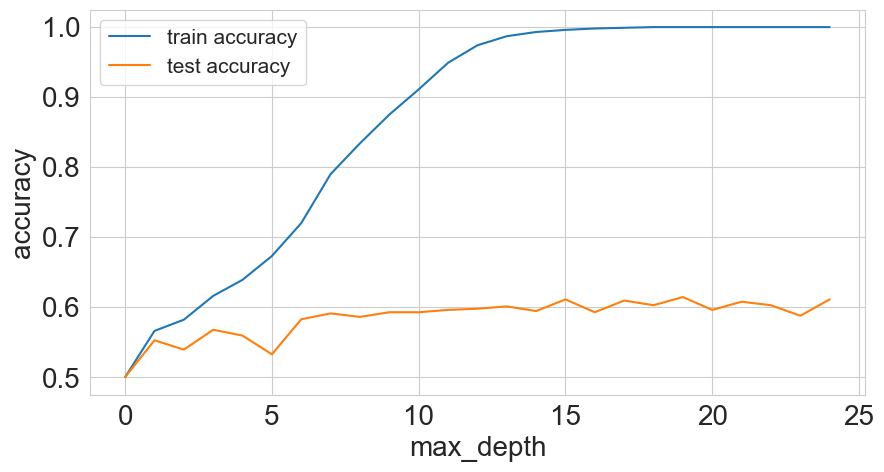

In [41]:
# 这是一个完整的代码的示例
# 导入 scikit-learn 的 tree 和 metrics
from sklearn import tree
from sklearn import metrics
# 导入 matplotlib 和 seaborn
# 用于绘图
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 设置全局标签文本的大小
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# 确保图表直接在笔记本内显示
%matplotlib inline

# 初始化用于存储训练和测试准确度的列表
# 我们从 50% 的准确度开始
train_accuracies = [0.5]
test_accuracies = [0.5]

# 遍历几个不同的树深度值
for depth in range(1, 25):
    # 初始化模型
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    # 选择用于训练的列/特征
    cols = [
        'fixed acidity', 'volatile acidity', 'citric acid',
        'residual sugar', 'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH',
        'sulphates', 'alcohol'
    ]

    # 在给定特征上拟合模型
    clf.fit(wine_train[cols], wine_train.quality)

    # 创建训练和测试预测
    train_predictions = clf.predict(wine_train[cols])
    test_predictions = clf.predict(wine_test[cols])

    # 计算训练和测试准确度
    train_accuracy = metrics.accuracy_score(
        wine_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
        wine_test.quality, test_predictions
    )

    # 添加准确度到列表
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# 使用 matplotlib 和 seaborn 创建两个图
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

观察结果表明，在最大深度（max_depth）设置为15的情况下，模型在测试集上的表现最佳。进一步增加该参数，虽然训练集的准确度有所提升，但测试集的准确度却停滞不前甚至下降。这反映出，随着决策树的最大深度增加，模型对训练数据的拟合度增强，然而其在测试数据上的表现并未得到相应的提升。

模型在训练数据上表现出完美的拟合能力，但在测试数据上的表现却不尽如人意。这表明模型能够精确地捕捉训练数据中的模式，但却无法有效地将这种学习应用到新的、未见过的数据上。在所提供的数据集中，构建一个具有较大最大深度（max_depth）的模型可以在训练集上取得优异的成绩，但这样的模型在实际应用中并不具有实用价值，因为它无法在现实世界的数据或实时数据上复现相似的优异表现。

有些人可能会认为，该方法并没有导致过拟合，因为测试集的准确度大体上保持稳定。按照另一种观点，过拟合是指随着训练损失的不断降低，测试损失却随之增加。这种现象在神经网络中尤其普遍。

在训练神经网络的过程中，监控训练集和测试集的损失是至关重要的。面对一个规模庞大的网络和一个小规模的数据集（样本数量有限）时，我们通常会发现，随着训练的进行，训练集和测试集的损失都会逐渐降低。然而，存在一个临界点，测试损失达到最低点后，即便训练损失继续下降，测试损失却开始上升。这个转折点就是我们应当停止训练的时机，以避免模型在训练数据上过度拟合，而无法在测试数据上保持良好性能。

过拟合的一个形象的可视化结果：

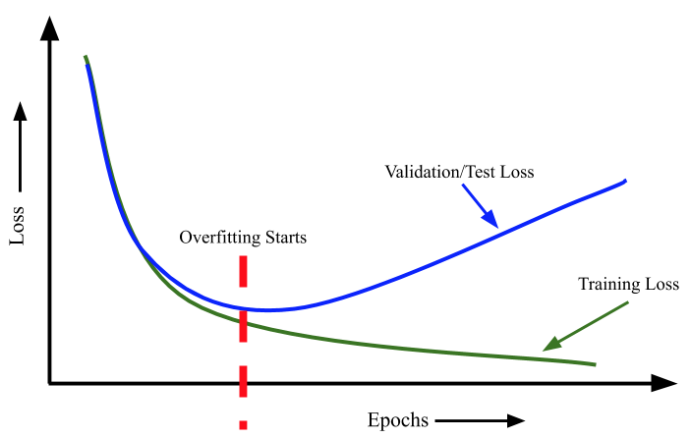

拓展知识：[奥卡姆剃刀原则](https://www.bilibili.com/video/BV1XW4y1M7YL/?spm_id_from=333.337.search-card.all.click&vd_source=70cc82c6f851aaa826e5c863112d2113)

# 回到交叉验证

在阐述过拟合的概念时，我选择将数据集划分为两个部分：一部分用于训练模型，另一部分用于评估模型的性能。这种方法也属于交叉验证的一种形式，通常被称作“暂留集”（hold-out set）。当数据量庞大，且模型推理过程较为耗时时，我们倾向于采用这种交叉验证方法。

交叉检验有许多不同的方法，它是建立一个良好的机器学习模型的最关键步骤。选择正确的交叉检验取决于所处理的数据集，在一个数据集上适用的交叉检验也可能不适用于其他数据集。不过，有几种类型的交叉检验技术最为流行和广泛使用。

其中包括：

- k 折交叉检验
- 分层 k 折交叉检验
- 暂留交叉检验
- 留一交叉检验
- 分组 k 折交叉检验

交叉检验是将训练数据分层几个部分，我们在其中一部分上训练模型，然后在其余部分上进行测试。

视频解释：https://www.bilibili.com/video/BV1GQ4y1P7Tv/?spm_id_from=333.337.search-card.all.click

在数据集不大的时候，如何划分数据集会导致模型的accuracy结果存在着较大的差异。

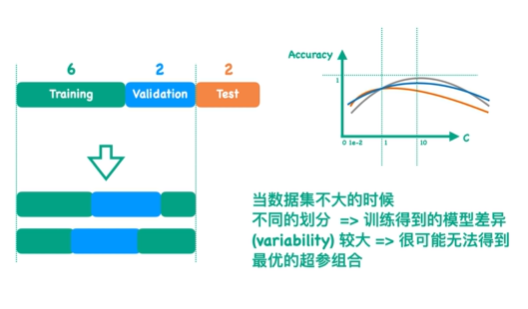

我们可以采用4折交叉验证：

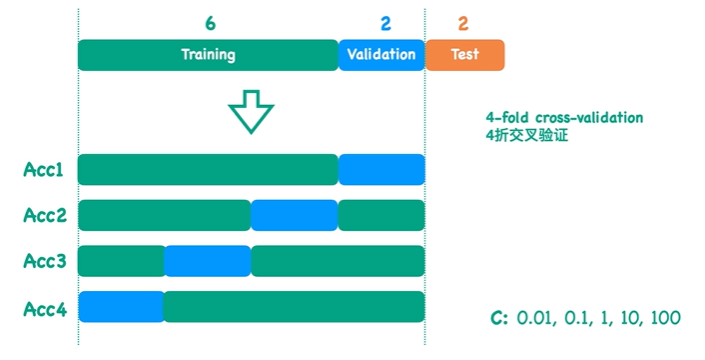

k-fold，k=4。

从理论上来讲，k的值可以取到n-1，因为极端情况之下只需要留取一个样本来进行验证。

In [43]:
# 导入 pandas 和 scikit-learn 的 model_selection 模块
import pandas as pd
from sklearn import model_selection

if __name__ == "__main__":
    # 可以先将之前的数据保存在dataset中
    wine_train.to_csv("./data/train.csv", index = False)
    
    # 训练数据存储在名为 train.csv 的 CSV 文件中
    df = pd.read_csv("./data/train.csv")

    # 我们创建一个名为 kfold 的新列，并用 -1 填充
    df["kfold"] = -1

    # 接下来的步骤是随机打乱数据的行
    df = df.sample(frac=1).reset_index(drop=True)

    # 从 model_selection 模块初始化 kfold 类
    kf = model_selection.KFold(n_splits=5)

    # 填充新的 kfold 列（enumerate的作用是返回一个迭代器）
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold

    # 保存带有 kfold 列的新 CSV 文件
    df.to_csv("./data/train_folds.csv", index=False)

另一种重要的交叉检验类型是分层 k 折交叉检验。如果你有一个偏斜的二元分类数据集，其中正样本占 90%，负样本只占 10%，那么你就不应该使用随机 k 折交叉。对这样的数据集使用简单的 k 折交叉检验可能会导致折叠样本全部为负样本。在这种情况下，我们更倾向于使用分层 k 折交叉检验。分层 k 折交叉检验可以保持每个折中标签的比例不变。因此，在每个折叠中，都会有相同的 90% 正样本和 10% 负样本。因此，无论您选择什么指标进行评估，都会在所有折叠中得到相似的结果。

修改创建 k 折交叉检验的代码以创建分层 k 折交叉检验也很容易。我们只需将 model_selection.KFold 更改为 model_selection.StratifiedKFold ，并在 kf.split(...) 函数中指定要分层的目标列。我们假设 CSV 数据集有一列名为 "target" ，并且是一个分类问题。

In [46]:
# 导入 pandas 和 scikit-learn 的 model_selection 模块
import pandas as pd
from sklearn import model_selection

if __name__ == "__main__":
    # 训练数据保存在名为 train.csv 的 CSV 文件中
    df = pd.read_csv("./data/train.csv")

    # 添加一个新列 kfold，并用 -1 初始化
    df["kfold"] = -1

    # 随机打乱数据行
    df = df.sample(frac=1).reset_index(drop=True)

    # 获取目标变量
    y = df.quality.values

    # 初始化 StratifiedKFold 类，设置折数（folds）为 5
    kf = model_selection.StratifiedKFold(n_splits=5)

    # 使用 StratifiedKFold 对象的 split 方法来获取训练和验证索引
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_, 'kfold'] = f

    # 保存包含 kfold 列的新 CSV 文件
    df.to_csv("./data/train_folds.csv", index=False)

我们可以查看一下葡萄酒数据集的标签的分类情况：

Text(0, 0.5, 'count')

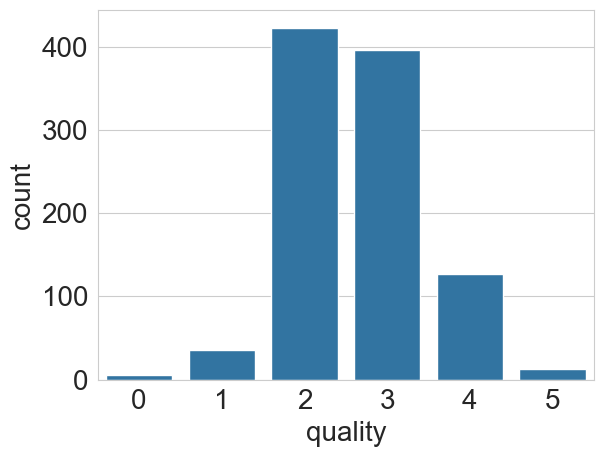

In [47]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

从图中可以看出，葡萄酒的质量偏差很大，有些类别的样本数量非常的多，但是一些类别则非常的少。

如果我们进行简单的 k 折交叉检验，那么每个折叠中的目标值分布都不会相同。因此，在这种情况下，我们选择分层 k 折交叉检验。